In [235]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

import json
import pandas as pd    

# Load the JSON file
path1 = 'datasets/CNN 2020-07 to 2025-02-14.json'
df = pd.read_json(path1)

# Extract the "data" list from "fear_and_greed_historical"
data_list = df["fear_and_greed_historical"]["data"]

junkBonds = df['junk_bond_demand']['data']
junkDF = pd.DataFrame(junkBonds)
junkDF['BND_FGI'] = junkDF['rating']

# Convert it into a DataFrame
data_df = pd.DataFrame(data_list)

data_df = pd.merge(data_df, junkDF[['x','BND_FGI']], on=['x','x'])

data_df['Date'] = pd.to_datetime(data_df['x'], unit='ms')
data_df['Date'] = data_df['Date'].dt.strftime('%Y-%m-%d')
data_df['SPY_FGI'] = data_df['y']

df = data_df[['Date', 'SPY_FGI', 'rating', 'BND_FGI']]

# Convert rating to numerical values
rating_map = {
    'extreme fear': 0,
    'fear': 1,
    'neutral': 2,
    'greed': 3,
    'extreme greed': 4
}
df['SPY_FGI'] = df['rating'].map(rating_map)
df['BND_FGI'] = df['BND_FGI'].map(rating_map)

df = df[['Date', 'SPY_FGI', 'BND_FGI']]
df

/var/folders/6h/tflctw7s3jb8k6w65jmxt4440000gn/T/ipykernel_77704/1711228976.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPY_FGI'] = df['rating'].map(rating_map)
/var/folders/6h/tflctw7s3jb8k6w65jmxt4440000gn/T/ipykernel_77704/1711228976.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BND_FGI'] = df['BND_FGI'].map(rating_map)


,Date,SPY_FGI,BND_FGI
0,2020-07-14,2,0
1,2020-07-15,2,0
2,2020-07-16,2,0
3,2020-07-17,2,0
4,2020-07-20,2,0
...,...,...,...
1152,2025-02-07,1,0
1153,2025-02-10,2,0
1154,2025-02-11,1,0
1155,2025-02-12,1,0


In [236]:
cryptoFGI = pd.read_csv('datasets/CryptoFEI.csv')

cryptoFGI['Crypto_FGI'] = cryptoFGI['Fng_classification'].str.lower().map(rating_map)
cryptoFGI['Date'] = pd.to_datetime(cryptoFGI['Date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
cryptoFGI

,Date,Fng_value,Fng_classification,Crypto_FGI
0,2025-02-17,51,Neutral,2
1,2025-02-16,54,Neutral,2
2,2025-02-15,50,Neutral,2
3,2025-02-14,48,Neutral,2
4,2025-02-13,50,Neutral,2
...,...,...,...,...
2565,2018-02-05,11,Extreme Fear,0
2566,2018-02-04,24,Extreme Fear,0
2567,2018-02-03,40,Fear,1
2568,2018-02-02,15,Extreme Fear,0


In [237]:
merged = pd.merge(df, cryptoFGI, on=['Date','Date'])
merged

,Date,SPY_FGI,BND_FGI,Fng_value,Fng_classification,Crypto_FGI
0,2020-07-14,2,0,43,Fear,1
1,2020-07-15,2,0,44,Fear,1
2,2020-07-16,2,0,43,Fear,1
3,2020-07-17,2,0,41,Fear,1
4,2020-07-20,2,0,44,Fear,1
...,...,...,...,...,...,...
1152,2025-02-07,1,0,44,Fear,1
1153,2025-02-10,2,0,43,Fear,1
1154,2025-02-11,1,0,47,Neutral,2
1155,2025-02-12,1,0,46,Fear,1


In [238]:
def gold_silver_sentiment(x):
    if x < 75:
        return 0
    elif 75 <= x < 80:
        return 1
    elif 80 <= x < 85:
        return 2
    elif 85 <= x < 90:
        return 3
    else:
        return 4

gldSilverFGI = pd.read_csv('datasets/Gold-Silver-Ratio-since-1693.csv', delimiter=';')
gldSilverFGI['Date'] = pd.to_datetime(gldSilverFGI['DateTime'])
gldSilverFGI['Date'] = gldSilverFGI['Date'].dt.strftime('%Y-%m-%d')
gldSilverFGI = gldSilverFGI[gldSilverFGI['Date'] > '2020-07-14']
# Fix Gold/Silver Ratio format (replace commas with dots)
gldSilverFGI['GLD_FGI'] = gldSilverFGI['Gold/Silver'].astype(str).str.replace(',', '.').astype(float).apply(gold_silver_sentiment)
gldSilverFGI[['Date', 'Gold/Silver']]
gldSilverFGI = gldSilverFGI.drop(columns=['DateTime'])

merged = pd.merge(merged, gldSilverFGI, on=['Date', 'Date'])
merged[['Date', 'SPY_FGI', 'BND_FGI', 'Crypto_FGI', 'GLD_FGI']]

,Date,SPY_FGI,BND_FGI,Crypto_FGI,GLD_FGI
0,2020-07-15,2,0,1,4
1,2020-07-16,2,0,1,4
2,2020-07-17,2,0,1,4
3,2020-07-20,2,0,1,4
4,2020-07-21,2,0,1,3
...,...,...,...,...,...
1150,2025-02-06,1,0,2,3
1151,2025-02-07,1,0,1,3
1152,2025-02-10,2,0,1,3
1153,2025-02-11,1,0,2,4


In [239]:
# S&P 500 ETF TRUST (SPY)
spy = yf.Ticker("SPY")
df_spy = pd.DataFrame(spy.history(start="2020-07-14"))
print("SPY historical data")
df_spy['Change'] = df_spy['Close'] - df_spy['Open']
df_spy['Change %'] = df_spy['Change'] / df_spy['Open'] * 100
df_spy.reset_index(inplace=True)
df_spy['Date'] = df_spy['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_spy[['Open', 'Close', 'Change', 'Change %']]

SPY historical data


,Open,Close,Change,Change %
0,292.581670,297.830048,5.248377,1.793816
1,301.089311,300.566345,-0.522965,-0.173691
2,298.642545,299.576416,0.933871,0.312705
3,300.594339,300.444916,-0.149423,-0.049709
4,300.174086,302.872986,2.698900,0.899112
...,...,...,...,...
1199,520.140015,527.250000,7.109985,1.366937
1200,540.429993,535.419983,-5.010010,-0.927041
1201,536.719971,546.690002,9.970032,1.857585
1202,546.650024,550.640015,3.989990,0.729898


In [240]:
# Vanguard Total Bond Market Index Fund (BND)
bnd = yf.Ticker("BND")
df_bnd = pd.DataFrame(bnd.history(start="2020-07-14"))
print("BND historical data")
df_bnd['Change'] = df_bnd['Close'] - df_bnd['Open']
df_bnd['Change %'] = df_bnd['Change'] / df_bnd['Open'] * 100
df_bnd.reset_index(inplace=True)
df_bnd['Date'] = df_bnd['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_bnd[['Open', 'Close', 'Change', 'Change %']]

BND historical data


,Open,Close,Change,Change %
0,77.485083,77.502563,0.017481,0.022560
1,77.528780,77.511299,-0.017481,-0.022548
2,77.616150,77.563721,-0.052429,-0.067550
3,77.694831,77.642395,-0.052436,-0.067490
4,77.773453,77.721024,-0.052429,-0.067413
...,...,...,...,...
1199,72.489998,72.379997,-0.110001,-0.151746
1200,72.820000,72.529999,-0.290001,-0.398244
1201,72.800003,72.940002,0.139999,0.192307
1202,73.089996,73.180000,0.090004,0.123141


In [241]:
# SPDR Gold Shares (GLD)
gld = yf.Ticker("GLD")
df_gld = pd.DataFrame(gld.history(start="2020-07-14"))
print("GLD historical data")
df_gld['Change'] = df_gld['Close'] - df_gld['Open']
df_gld['Change %'] = df_gld['Change'] / df_gld['Open'] * 100
df_gld.reset_index(inplace=True)
df_gld['Date'] = df_gld['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_gld[['Date', 'Open', 'Close', 'Change', 'Change %']]


GLD historical data


,Date,Open,Close,Change,Change %
0,2020-07-14,168.970001,170.190002,1.220001,0.722022
1,2020-07-15,169.619995,170.339996,0.720001,0.424479
2,2020-07-16,169.800003,168.729996,-1.070007,-0.630157
3,2020-07-17,169.940002,170.119995,0.179993,0.105915
4,2020-07-20,170.759995,170.940002,0.180008,0.105416
...,...,...,...,...,...
1199,2025-04-22,317.489990,311.109985,-6.380005,-2.009514
1200,2025-04-23,304.179993,303.649994,-0.529999,-0.174239
1201,2025-04-24,306.980011,308.070007,1.089996,0.355071
1202,2025-04-25,301.779999,304.730011,2.950012,0.977537


In [242]:
# 21Shares Crypto Basket Index ETP (HODL.PA)
hodl = yf.Ticker("HODL.PA")
df_hodl = pd.DataFrame(hodl.history(start="2022-05-05"))
print("hodl historical data")
df_hodl['Change'] = df_hodl['Close'] - df_hodl['Open']
df_hodl['Change %'] = df_hodl['Change'] / df_hodl['Open'] * 100
df_hodl.reset_index(inplace=True)
df_hodl['Date'] = df_hodl['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_hodl[['Open', 'Close', 'Change', 'Change %']]


hodl historical data


,Open,Close,Change,Change %
0,15.0100,15.0100,0.0000,0.000000
1,15.0100,15.0100,0.0000,0.000000
2,10.1300,9.9000,-0.2300,-2.270489
3,9.8700,9.8700,0.0000,0.000000
4,9.8700,9.8700,0.0000,0.000000
...,...,...,...,...
758,12.9939,13.4124,0.4185,3.220742
759,13.9442,13.7177,-0.2265,-1.624328
760,13.7077,13.8389,0.1312,0.957125
761,14.0014,14.1237,0.1223,0.873485


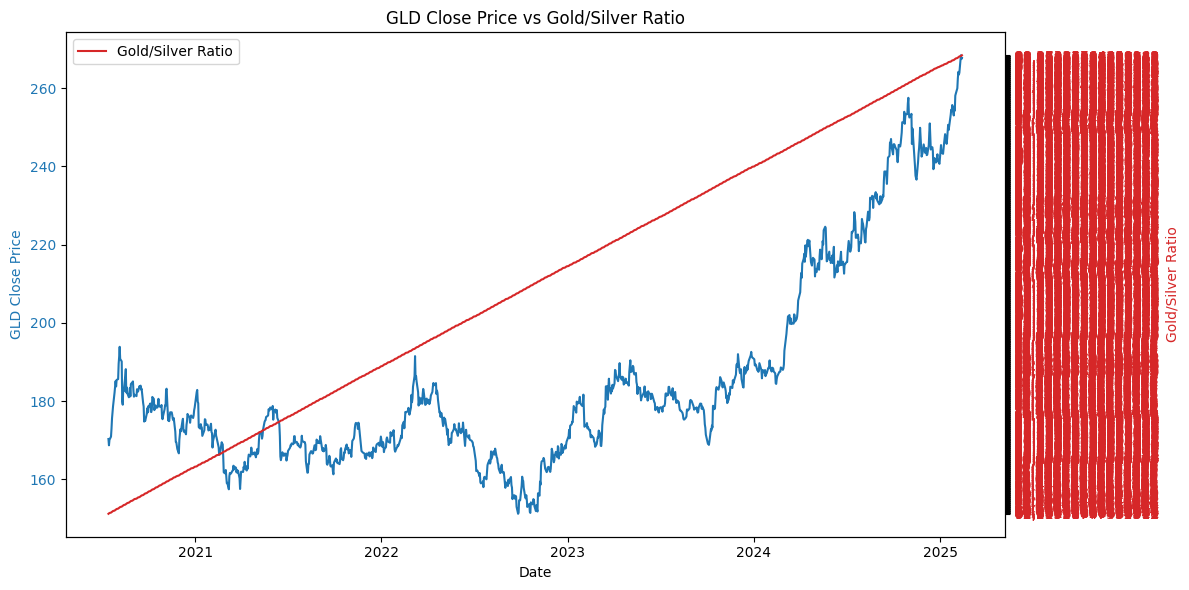

In [243]:
# Merge to fit both into the plot
merged_df = pd.merge(df_gld, gldSilverFGI, left_on='Date', right_on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GLD Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("GLD Close Price", color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Close'], label="GLD Close", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Gold/Silver Ratio
ax2 = ax1.twinx()
ax2.set_ylabel("Gold/Silver Ratio", color='tab:red')
ax2.plot(merged_df['Date'], merged_df['Gold/Silver'], label="Gold/Silver Ratio", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title("GLD Close Price vs Gold/Silver Ratio")
fig.tight_layout()
plt.legend()
plt.show()

## Gold Close Price vs Fear and Greed Index for gold
This currently shows that the gold price goes up when Gold/Silver ratio goes down ("fearful") and up when GS ratio increases, for example look at the huge negative correlation between 2022-2023

### Room for improvement
Not sure

KeyError: 'y'

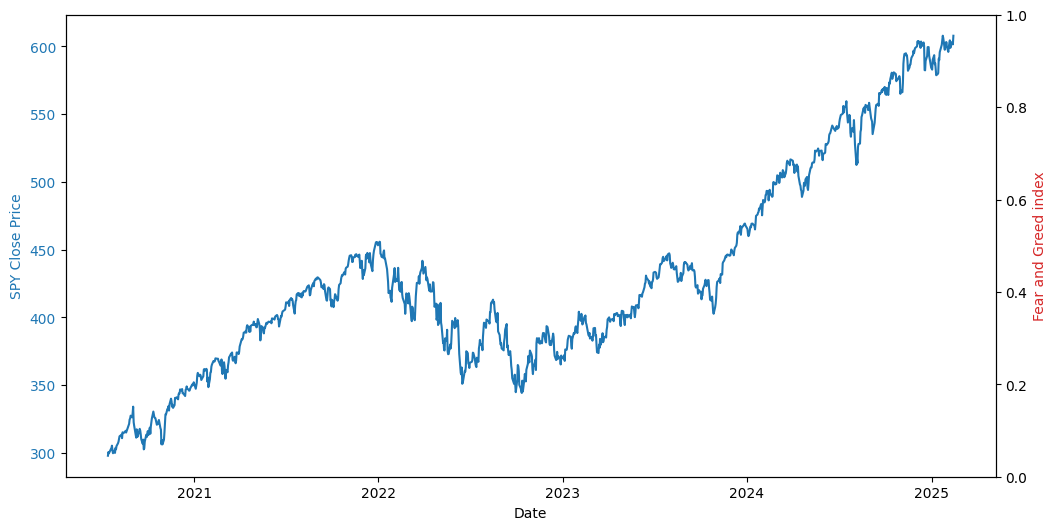

In [244]:
# Merge to fit both into the plot
merged_df = pd.merge(df_spy, df, left_on='Date', right_on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GLD Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY Close Price", color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Close'], label="SPY Close", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Gold/Silver Ratio
ax2 = ax1.twinx()
ax2.set_ylabel("Fear and Greed index", color='tab:red')
ax2.plot(merged_df['Date'], merged_df['y'], label="Fear and Greed Index", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title("SPY Close Price vs Fear and Greed Index")
fig.tight_layout()
plt.legend()
plt.show()

## SPY Close Price vs Fear and Greed Index
This currently shows that the market goes up when investors are greedy (high FG-value) and down when becoming fearful, for example look at the huge drop right before 2022. 

### Room for improvement
Make the SPY values normalized? It might not be great visualization since we cant follow larger changes.